In [22]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Lendo a base de dados e elaborando os testes

In [23]:
path = "../Atividades/Atividade 9/weatherHistory.csv"
df = pd.read_csv(path)
df = df.set_index("Formatted Date")
df = df.drop(['Daily Summary'],axis=1)
df["Summary"] = df["Summary"].astype('category').cat.codes
df = df[df["Precip Type"].notna()]
df["Precip Type"] =  df["Precip Type"].astype('category').cat.codes
df["Precip Type"].unique()

array([0, 1], dtype=int8)

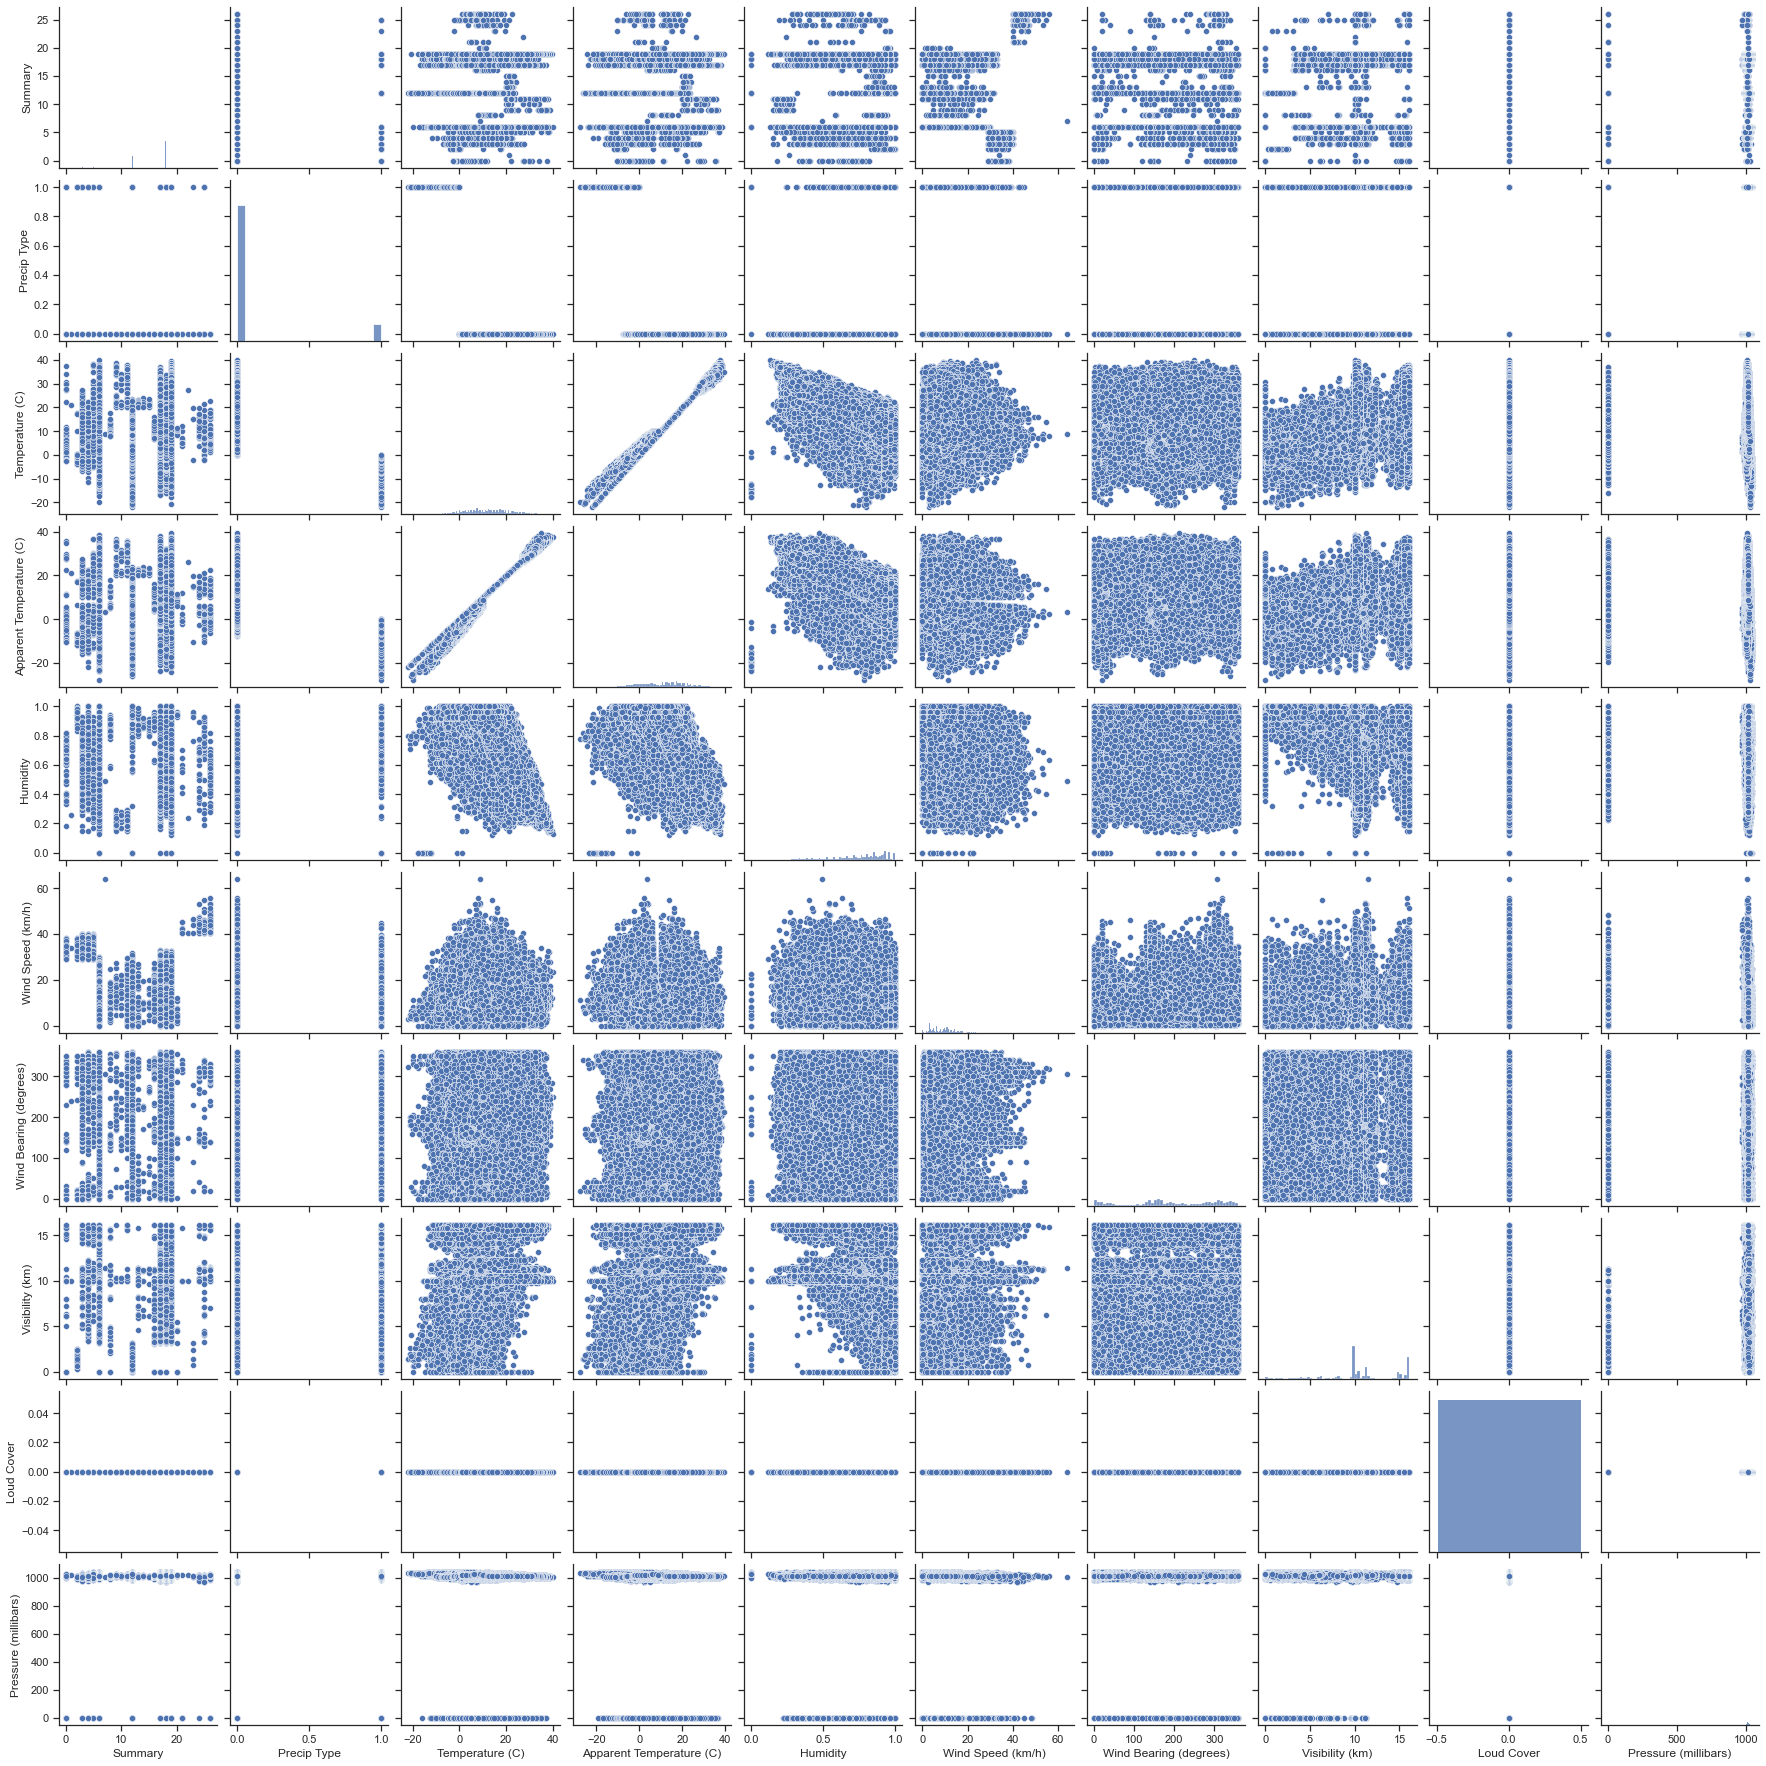

In [21]:
sns.set(style="ticks")
sns.pairplot(df)
plt.show()

In [24]:
xTrain,xTest,yTrain,yTest = train_test_split(
    df[['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']],
    df['Precip Type'],
    test_size=0.2,random_state=0
)

<h2>KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xTrain,yTrain)
print("Accuracy = {0}%".format(100*np.sum(knn.predict(xTest) == yTest)/len(yTest)))

Accuracy = 98.0560767146133%


<h2> SVM

In [26]:
from sklearn import svm
svm = svm.SVC(kernel='linear', probability=True)
svm.fit(xTrain,yTrain)
print("Accuracy = {0}%".format(100*np.sum(svm.predict(xTest) == yTest)/len(yTest)))

Accuracy = 100.0%


<h2> SGD
   

In [27]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", max_iter=500)
sgd.fit(xTrain,yTrain)
print("Accuracy = {0}%".format(100*np.sum(sgd.predict(xTest) == yTest)/len(yTest)))

Accuracy = 95.55451323744006%


<h2>  Qual a acurácia, precisão e revocação para cada rótulo (tipo de precipitação) para cada algoritmo
testado? Existe algum algoritmo com resultados melhores?

In [28]:
from sklearn import metrics

<h4> KNN

In [29]:
print(metrics.classification_report(yTest,knn.predict(xTest)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17026
           1       0.93      0.89      0.91      2162

    accuracy                           0.98     19188
   macro avg       0.96      0.94      0.95     19188
weighted avg       0.98      0.98      0.98     19188



<h4> SVM

In [30]:
print(metrics.classification_report(yTest,svm.predict(xTest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17026
           1       1.00      1.00      1.00      2162

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



<h4> SGD

In [31]:
print(metrics.classification_report(yTest,sgd.predict(xTest)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     17026
           1       1.00      0.61      0.75      2162

    accuracy                           0.96     19188
   macro avg       0.98      0.80      0.87     19188
weighted avg       0.96      0.96      0.95     19188



<h2>  É possível melhorar o algoritmo se forem selecionados alguns atributos em particular, ao invés
de utilizar todos?


<p> Sim.
<p> No caso do KNN irá ter vizinhos mais próximos e mais semelhantes se tivermos menos atributos, portanto, sua 'accuracy' aumenta.
<p> No caso do SGD por exemplo,o algoritmo irá demandar menos iterações e obter resultados mais exatos, pois, os dados ficarão menos espalhados
<p> No caso do SVM, como ele está com f-1-score de 1, não há possibilidades de melhora.

<h2> Você percebeu alguma diferença no tempo de processamento dos algoritmos? Qual foi o mais
lento? E qual foi o mais rápido?

Uma das vantagens de se usar o VSCode é a questão que ele mede o tempo de execução de cada célula. Portanto, os valores serão tirados do tempo mostrado por lá. Em ordem:
* SGD : 0.4s
* KNN : 3.9s 
* SVM : 22.4s

<h2> Mostre a matriz de confusão para os resultados (pesquise como fazer isso).

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<h3> KNN

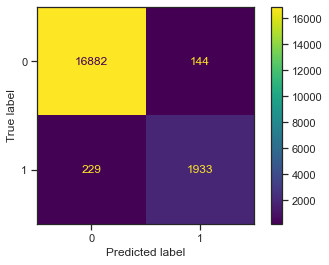

In [33]:

plot = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(yTest,knn.predict(xTest)),
 display_labels = knn.classes_
)
plot.plot()

<h3> SGD


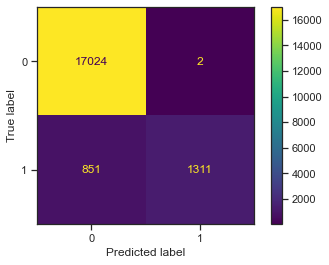

In [34]:

plot = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(yTest,sgd.predict(xTest)),
 display_labels = sgd.classes_
)
plot.plot()

<h3> SVM

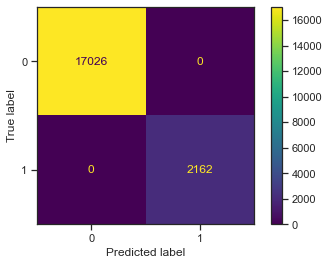

In [35]:

plot = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(yTest,svm.predict(xTest)),
 display_labels = svm.classes_
)
plot.plot()